# Описание проекта. Рекомендация тарифов
В распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

Описание данных
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:  
**сalls** — количество звонков,  
**minutes** — суммарная длительность звонков в минутах,  
**messages** — количество sms-сообщений,  
**mb_used** — израсходованный интернет-трафик в Мб,  
**is_ultra** — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Описание-проекта.-Рекомендация-тарифов" data-toc-modified-id="Описание-проекта.-Рекомендация-тарифов">
                    Описание проекта. Рекомендация тарифов
                </a>
            </span>            
    </ul>
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Открытие-и-изучение-файла" data-toc-modified-id="Открытие-и-изучение-файла">
                    <span class="toc-item-num">
                        1&nbsp;&nbsp;
                    </span>
                    Открытие и изучение файла
                </a>
            </span>
    </ul>
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Разбивка-данных-на-выборки" data-toc-modified-id="Разбивка-данных-на-выборки">
                    <span class="toc-item-num">
                        2&nbsp;&nbsp;
                    </span>
                    Разбивка данных на выборки
                </a>
            </span>
    </ul>
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Исследование-моделей" data-toc-modified-id="Исследование-моделей">
                    <span class="toc-item-num">
                        3&nbsp;&nbsp;
                    </span>
                    Исследование моделей
                </a>
            </span>
    </ul>
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке">
                    <span class="toc-item-num">
                        4&nbsp;&nbsp;
                    </span>
                    Проверка модели на тестовой выборке
                </a>
            </span>
    </ul>
     <ul class="toc-item">
        <li>
            <span>
                <a href="#Проверка-модели-на-адекватность-(бонус)" data-toc-modified-id="Проверка-модели-на-адекватность-(бонус)">
                    <span class="toc-item-num">
                        5&nbsp;&nbsp;
                    </span>
                    Проверка модели на адекватность (бонус)
                </a>
            </span>
    </ul>
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта">
                    <span class="toc-item-num">
                        6&nbsp;&nbsp;
                    </span>
                    Чек-лист готовности проекта
                </a>
            </span>
        </li>
    </ul>
</div>

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
import traceback
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 29)
data_file_name = 'users_behavior.csv'
local_path = 'C:/Users/timpu/Desktop/Data Science(Проекты и шпаргалки)/Проекты/Рекомендация_тарифов(машинное_обучение_1)/data/'
web_path = '/datasets/'
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

## Открытие и изучение файла

In [4]:
try:
    data = pd.read_csv(web_path + data_file_name)
except FileNotFoundError:
    data = pd.read_csv(local_path + data_file_name)
except:
    print('Возникла ошибка в коде, нужно перепроверить!')
    traceback.print_exc()
else:
    print('Общая информация о датасете:')
    data.info()
    display(data)
    print('Минимальные значения в датасете:')
    print(data.min(), '\n')
    print('Максимальные значения в датасете:')
    print(data.max(), '\n')
    print('Количество дубликатов в датасете:')
    print(data.duplicated().sum(), '\n')
    print('Колонки с пропущенными значениями в датасете:\n')
    print(data.isna().sum(), '\n')
    for col in data.columns:
        print(f'Подсчёт уникальных значений в столбце {col}:\n')
        print(data[col].value_counts().sort_values(ascending=False), '\n')

Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


Минимальные значения в датасете:
calls       0.0
minutes     0.0
messages    0.0
mb_used     0.0
is_ultra    0.0
dtype: float64 

Максимальные значения в датасете:
calls         244.00
minutes      1632.06
messages      224.00
mb_used     49745.73
is_ultra        1.00
dtype: float64 

Количество дубликатов в датасете:
0 

Колонки с пропущенными значениями в датасете:

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64 

Подсчёт уникальных значений в столбце calls:

69.0     60
68.0     49
64.0     48
77.0     47
65.0     47
         ..
188.0     1
173.0     1
183.0     1
169.0     1
244.0     1
Name: calls, Length: 184, dtype: int64 

Подсчёт уникальных значений в столбце minutes:

0.00      40
1.00       3
564.01     3
2.00       3
271.41     2
          ..
809.93     1
699.74     1
385.09     1
112.54     1
722.64     1
Name: minutes, Length: 3144, dtype: int64 

Подсчёт уникальных значений в столбце messages:

0.0      497
20.0      52
6.0       46
16

## Разбивка данных на выборки

In [5]:
print('data.shape:', data.shape, '100% от data', '\n')
print('Количество уникальных значений в целевом столбце is_ultra:')
print(data['is_ultra'].value_counts(), '\n')
print('Доля 0 значений в is_ultra в исходном датасете:', round(data[data['is_ultra']==1]['is_ultra'].sum()/data.shape[0], 2), '\n')

data.shape: (3214, 5) 100% от data 

Количество уникальных значений в целевом столбце is_ultra:
0    2229
1     985
Name: is_ultra, dtype: int64 

Доля 0 значений в is_ultra в исходном датасете: 0.31 



In [6]:
data_train_valid, data_test = train_test_split(data, test_size=0.2, random_state=54321)
print('data_test.shape:', data_test.shape, round(data_test.shape[0]/data.shape[0], 2)*100, '% от data', '\n')
print('Количество уникальных значений в целевом столбце is_ultra (БЕЗ stratify):')
print(data_test['is_ultra'].value_counts(), '\n')
print('Доля 0 значений в is_ultra data_test БЕЗ stratify:', round(data_test[data_test['is_ultra']==1]['is_ultra'].sum()/data_test.shape[0], 2), '\n')

data_train_valid, data_test = train_test_split(data, test_size=0.2, random_state=54321, stratify = data['is_ultra'])
print('Количество уникальных значений в целевом столбце is_ultra (С stratify):')
print(data_test['is_ultra'].value_counts(),'\n')
print('Доля 0 значений в is_ultra data_test С stratify:', round(data_test[data_test['is_ultra']==1]['is_ultra'].sum()/data_test.shape[0], 2))



data_test.shape: (643, 5) 20.0 % от data 

Количество уникальных значений в целевом столбце is_ultra (БЕЗ stratify):
0    427
1    216
Name: is_ultra, dtype: int64 

Доля 0 значений в is_ultra data_test БЕЗ stratify: 0.34 

Количество уникальных значений в целевом столбце is_ultra (С stratify):
0    446
1    197
Name: is_ultra, dtype: int64 

Доля 0 значений в is_ultra data_test С stratify: 0.31


In [7]:
data_train, data_valid1 = train_test_split(data_train_valid, test_size=0.25, random_state=54321)
print('data_train.shape:', data_train.shape, round(data_train.shape[0]/data.shape[0], 2)*100, '% от data', '\n')
print('Количество уникальных значений в целевом столбце is_ultra (БЕЗ stratify):')
print(data_train['is_ultra'].value_counts(),'\n')
print('Доля 0 значений в is_ultra data_train БЕЗ stratify:', round(data_train[data_train['is_ultra']==1]['is_ultra'].sum()/data_train.shape[0], 2), '\n')

data_train, data_valid = train_test_split(data_train_valid, test_size=0.25, random_state=54321, stratify = data_train_valid['is_ultra'])
print('data_train.shape:', data_train.shape, round(data_train.shape[0]/data.shape[0], 2)*100, '% от data')
print('Количество уникальных значений в целевом столбце is_ultra (C stratify):')
print(data_train['is_ultra'].value_counts(),'\n')
print('Доля 0 значений в is_ultra data_train БЕЗ stratify:', round(data_train[data_train['is_ultra']==1]['is_ultra'].sum()/data_train.shape[0], 2), '\n')



data_train.shape: (1928, 5) 60.0 % от data 

Количество уникальных значений в целевом столбце is_ultra (БЕЗ stratify):
0    1345
1     583
Name: is_ultra, dtype: int64 

Доля 0 значений в is_ultra data_train БЕЗ stratify: 0.3 

data_train.shape: (1928, 5) 60.0 % от data
Количество уникальных значений в целевом столбце is_ultra (C stratify):
0    1337
1     591
Name: is_ultra, dtype: int64 

Доля 0 значений в is_ultra data_train БЕЗ stratify: 0.31 



In [8]:
print('data_valid.shape:', data_valid.shape, round(data_valid.shape[0]/data.shape[0], 2)*100, '% от data', '\n')
print('Количество уникальных значений в целевом столбце is_ultra (БЕЗ stratify):')
print(data_valid1['is_ultra'].value_counts(), '\n')

print('Доля 0 значений в is_ultra data_valid БЕЗ stratify:', round(data_valid1[data_valid1['is_ultra']==1]['is_ultra'].sum()/data_valid1.shape[0], 2), '\n')

print('data_train, C stratify:')
print(data_valid['is_ultra'].value_counts(),'\n')

print('Доля 0 значений в is_ultra data_valid С stratify:', round(data_valid[data_valid['is_ultra']==1]['is_ultra'].sum()/data_valid.shape[0], 2), '\n')

data_valid.shape: (643, 5) 20.0 % от data 

Количество уникальных значений в целевом столбце is_ultra (БЕЗ stratify):
0    438
1    205
Name: is_ultra, dtype: int64 

Доля 0 значений в is_ultra data_valid БЕЗ stratify: 0.32 

data_train, C stratify:
0    446
1    197
Name: is_ultra, dtype: int64 

Доля 0 значений в is_ultra data_valid С stratify: 0.31 



Разбили данные на 3 выборки: тренировочную, валидационную и тестовую (data_train, data_valid, data_test) в пропорции 60/20/20.

## Исследование моделей

Лучшая модель DecisionTree на валидационной выборке с глубиной: 5
Лучшая accuracy на валидационной выборке: 0.8118195956454122


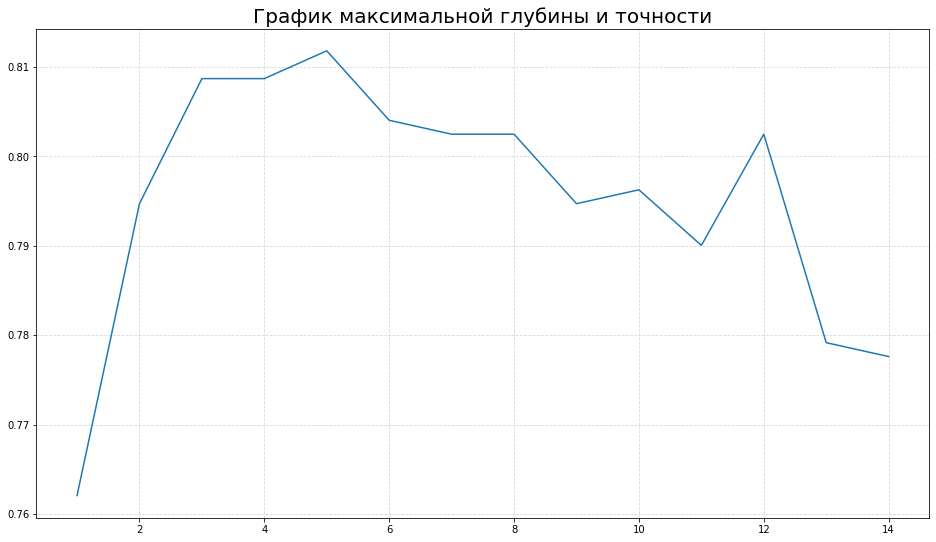

CPU times: user 316 ms, sys: 20.7 ms, total: 336 ms
Wall time: 338 ms


In [9]:
%%time
features_train = data_train.drop('is_ultra', axis=1)
target_train = data_train['is_ultra']
features_valid = data_valid.drop('is_ultra', axis=1)
target_valid = data_valid['is_ultra']
best_depth = 0
best_accuracy = 0
list_depth = []
list_accur = []
# for depth in range(1, 11):
# КОД РЕВЬЮЕРА
for depth in range(1, 15):
# КОД РЕВЬЮЕРА    
    model = DecisionTreeClassifier(random_state=54321, max_depth=depth)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions)
    list_depth.append(depth)
    list_accur.append(accuracy)
    if accuracy > best_accuracy:
        best_depth = depth
        best_accuracy = accuracy
        model_DT = model
print('Лучшая модель DecisionTree на валидационной выборке с глубиной:', best_depth)
print('Лучшая accuracy на валидационной выборке:', best_accuracy)
plt.figure(figsize=(16,9)) 
plt.title('График максимальной глубины и точности', fontdict={'size':20})
plt.plot(list_depth, list_accur)
plt.grid(linestyle='--', alpha=0.5)
plt.show()

Лучшая модель RandomForestClassifier на валидационной выборке с глубиной: 10
Лучшая модель RandomForestClassifier на валидационной выборке с n_estimators: 11
Лучшая accuracy на валидационной выборке: 0.8211508553654744


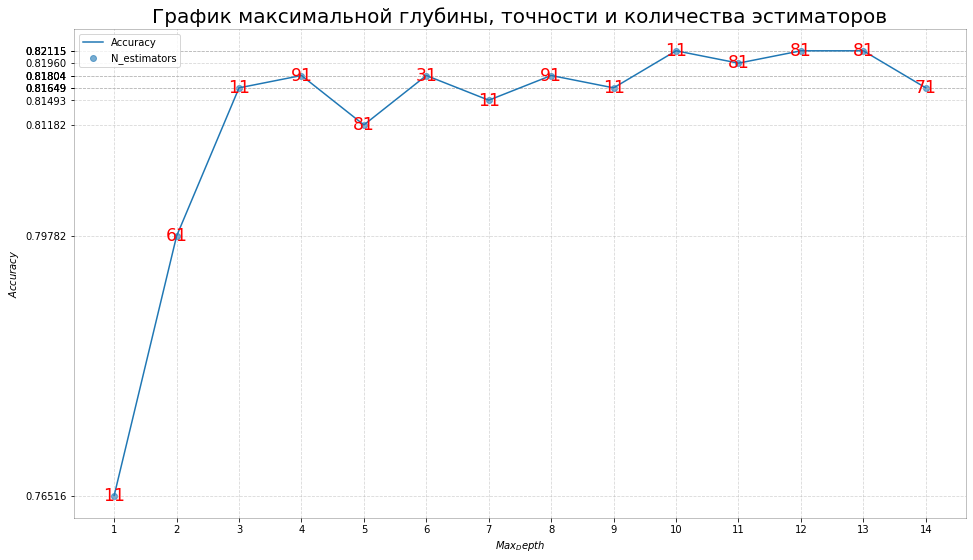

CPU times: user 20 s, sys: 132 ms, total: 20.1 s
Wall time: 20.1 s


In [26]:
%%time
best_depth = 0
best_accuracy = 0
best_est_count = 0
list_depth = []
list_est = []
#list_accur = []
list_accur_depth = []
xyz = pd.DataFrame([['', '', '']], columns=['est', 'depth', 'accuracy'])
for depth in range(1, 15):
    best_est = 0
    best_acc_est=0
    for est_count in range(1, 101, 10):
        model = RandomForestClassifier(random_state=54321, max_depth=depth, n_estimators=est_count)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        accuracy = accuracy_score(target_valid, predictions)
        #xyz = xyz.append({'est' : est_count, 'depth' : depth, 'accuracy' : depth}, ignore_index=True)
        if accuracy > best_acc_est:
            best_est = est_count
            best_acc_est = accuracy
        if accuracy > best_accuracy:
            best_depth = depth
            best_accuracy = accuracy
            best_est_count = est_count
            model_RF = model
    xyz = xyz.append({'est' : best_est, 'depth' : depth, 'accuracy' : best_acc_est}, ignore_index=True)
    list_est.append(best_est)
    list_depth.append(depth)
    list_accur_depth.append(best_acc_est)
print('Лучшая модель RandomForestClassifier на валидационной выборке с глубиной:', best_depth)
print('Лучшая модель RandomForestClassifier на валидационной выборке с n_estimators:', best_est_count)
print('Лучшая accuracy на валидационной выборке:', best_accuracy)

plt.figure(figsize=(16,9))
plt.scatter(list_depth, list_accur_depth, alpha=.6)#, color=red)
for x, y, tex in zip(list_depth, list_accur_depth, list_est):
    t = plt.text(x, y, tex, horizontalalignment='center', 
                 verticalalignment='center', fontdict={'color':'red', 'fontsize':'xx-large'})
plt.plot(list_depth, list_accur_depth)
plt.legend(['Accuracy', 'N_estimators'])

plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)
plt.xticks(list_depth)
plt.yticks(list_accur_depth)
plt.title('График максимальной глубины, точности и количества эстиматоров', fontdict={'size':20})
plt.xlabel('$Max_Depth$')
plt.ylabel('$Accuracy$')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

In [27]:
import plotly.express as px
fig = px.scatter_3d(xyz, 
                    x='est', 
                    y='depth', 
                    z='accuracy', 
                    title= 'Зависимость accuracy модели от параметра max_depth и n_estimators',
                    width=1000,
                    height=1000)
fig.show()

In [28]:
%%time
from sklearn.model_selection import GridSearchCV
#features = data.drop('is_ultra', axis=1)
#target = data['is_ultra']

features = data_train_valid.drop('is_ultra', axis=1)
target = data_train_valid['is_ultra']

parametrs = { 'n_estimators': range (1, 101, 10),
              'max_depth': range (1,15, 1)
            }
clf = RandomForestClassifier(random_state=54321)
grid = GridSearchCV(clf, parametrs)
grid.fit(features, target)

CPU times: user 1min 42s, sys: 497 ms, total: 1min 42s
Wall time: 1min 42s


GridSearchCV(estimator=RandomForestClassifier(random_state=54321),
             param_grid={'max_depth': range(1, 15),
                         'n_estimators': range(1, 101, 10)})

In [30]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'max_depth': 10, 'n_estimators': 51}
0.8090227040912696
RandomForestClassifier(max_depth=10, n_estimators=51, random_state=54321)


In [ ]:
%%time

best_accuracy = 0
comb_param = {'newton-cg': ['l2', 'none'],
             'lbfgs': ['l2', 'none'],
             'saga': ['l1', 'l2']
            }

for m_iter in range(100, 1000, 100):
    for c_val in [100, 10, 0.1]:
        for solvr_param in comb_param:
            for pen_ty in comb_param[solvr_param]:
                model = LogisticRegression(random_state = 54321, solver = solvr_param, C=c_val, penalty = pen_ty, max_iter = m_iter)
                model.fit(features_train, target_train)
                predictions = model.predict(features_valid)
                accuracy = accuracy_score(target_valid, predictions)
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_param = 'solver=' + solvr_param +', penalty=' + pen_ty + ', max_iter=' + str(m_iter) + ', C=' + str(c_val)
                    model_LR = model

print('Лучшая модель LogisticRegression на валидационной выборке с параметрами:', best_param)
print('Лучшая accuracy на валидационной выборке:', best_accuracy)

In [ ]:
features = data.drop('is_ultra', axis=1)
target = data['is_ultra']
lr_model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 0.1]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=lr_model, param_grid=grid, n_jobs=-1, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(features, target)

print("Лучшая accuracy LogisticRegression: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

**Вывод**  
Таким образом, максимальную точность (accuracy) показывает модель - случайный лес (RandomForestClassifier).

## Проверка модели на тестовой выборке

In [ ]:
%%time

features_train_valid = data_train_valid.drop('is_ultra', axis=1)
target__train_valid = data_train_valid['is_ultra']

features_test = data_test.drop('is_ultra', axis=1)
target__test = data_test['is_ultra']


model_RF = RandomForestClassifier(random_state=54321, max_depth=10, n_estimators=11)
model_RF.fit(features_train_valid, target__train_valid)

predictions = model_RF.predict(features_test)
accuracy = accuracy_score(target_test, predictions)
print('Модель RandomForestClassifier переобученная на объединённой (обучающая+валидационная) выборке показала accuracy на тесте:', accuracy)

In [ ]:
%%time

features_train_valid = data_train_valid.drop('is_ultra', axis=1)
target__train_valid = data_train_valid['is_ultra']

features_test = data_test.drop('is_ultra', axis=1)
target__test = data_test['is_ultra']


model_RF = RandomForestClassifier(random_state=54321, max_depth=11, n_estimators=71)
model_RF.fit(features_train_valid, target__train_valid)

predictions = model_RF.predict(features_test)
accuracy = accuracy_score(target_test, predictions)
print('Модель RandomForestClassifier переобученная на объединённой (обучающая+валидационная) выборке показала accuracy на тесте(гиперпараметры подобраны GridSearch):', accuracy)

**Вывод**  
Таким образом, наилучшую точность модель RandomForest показала при переобучении на обучающе-валидационной выборке с гиперпараметрами, подобранными алгоритмическим способом, с гиперпараметрами от GreedSearch значения точности немного ниже.

## Проверка модели на адекватность (бонус)

In [ ]:
model_Dummy = DummyClassifier(random_state=54321)
model_Dummy.fit(features_train, target_train)
predictions = model_Dummy.predict(features_test)
accuracy = accuracy_score(target_test, predictions)
print('Модель DummyClassifier на тестовой выборке показала accuracy:', accuracy)

**Вывод**  
Таким образом, оценивая вменяемость модели model_RF (случайный лес) в сравнении с моделью model_Dummy (модель, не использующая входящих данных), можно сделать вывод, что обученная нами в данном исследовании модель проявляет себя заметно лучше по показателю accuracy, т.е. имеет предсказательную применимость.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
